<font size="+5">#05. Hiperparametros del Modelo</font>

# Cargar Datos

> Copiamos y pegamos en una celda las siguientes líneas de código para cargar una tabla de datos que contiene información de personas que han solicitado tarjetas de crédito. La variable objetivo se sitúa en la columna `target` y nos cuenta si una persona ha sido apta para la tarjeta o no...

```python
import pandas as pd
pd.set_option("display.max_columns", None)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
df = pd.read_excel(io=url, header=1, index_col=0)
df.sample(10)
```

In [2]:
import pandas as pd
pd.set_option("display.max_columns", None)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
df = pd.read_excel(io=url, header=1, index_col=0)
df.sample(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
5812,210000,2,1,1,34,0,0,0,0,0,0,201324,207222,209189,106090,108300,87404,10646,8601,3601,3719,3300,3400,0
17071,250000,2,2,2,26,0,0,0,2,2,2,124353,132251,148597,135715,76113,26366,10000,19888,2500,10302,17500,3000,0
21902,140000,2,1,2,27,0,0,0,0,0,0,14997,16437,18848,21209,25503,27918,2000,3000,3000,5000,3000,10000,0
3203,70000,2,1,2,25,0,0,0,0,0,0,71106,67954,68976,49145,49688,47780,3292,3290,1706,1759,1729,1717,0
21151,110000,1,3,2,44,0,0,0,0,0,0,102274,103275,105225,83722,78894,74659,3734,3653,2914,2627,2624,4138,0
25665,170000,2,2,2,25,0,0,2,0,0,0,57198,59379,28679,29215,19415,19531,3200,2000,3000,10000,2000,0,0
6113,500000,1,1,2,28,-2,-2,-2,-1,2,-1,17155,0,0,1116,969,6745,0,0,1116,3,6745,5003,0
12845,200000,1,1,1,30,0,0,0,0,0,0,182338,123079,124075,99440,104685,54038,4653,5000,5000,6000,5000,10000,0
28748,50000,2,2,1,28,3,2,2,7,7,7,2400,2400,2400,2400,2400,2400,0,0,0,0,0,0,0


# Seleccionar Variables para el Modelo

> 1.  Explicativas/Features/Input `X`
> 2.  Objetivo/Class/Target `y`

In [4]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]
print(y)

ID
1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: default payment next month, Length: 30000, dtype: int64


# Separar Datos en Train & Test

> En el capítulo anterior vimos que la técnica `Train Test Split` se debe usar siempre que queramos ver cómo de bueno es nuestro modelo. En cualquier proyecto que tenga como objetivo calcular una variable de interés debemos separar los datos que ya tenemos en `Entrenamiento` y `Testeo`.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Árbol de Decisión con Hiperparámetros por Defecto

> El objetivo de este tópico es configurar los hiperparámetros para lograr una mayor precisión en los datos de `Testeo`. De momento, vamos a ver cómo se comporta el modelo con los hiperparámetros por defecto.

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
model = DecisionTreeClassifier(max_depth=20)

In [19]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20)

## Precisión

> Tanto en los datos de `Entrenamiento` como de `Testeo`.

In [20]:
model.score(X_train,y_train)

0.9533333333333334

In [21]:
model.score(X_test,y_test)

0.758989898989899

## Visualización del Árbol

> Interpretamos las precisiones a través de la visualización.

In [22]:
from sklearn import tree

In [23]:
from sklearn.tree import plot_tree

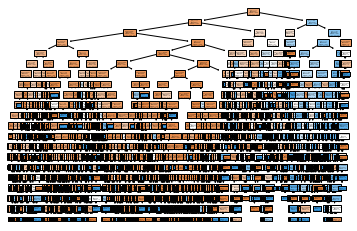

In [24]:
tree.plot_tree(model, filled=True);

# Árbol de Decisión cambiando Algunos Hiperparámetros

> Usaremos las siguientes líneas de código para ver qué hiperparámetros podríamos configurar:

```python
model = DecisionTreeClassifier()
model.get_params()
```

> Debemos realizar al menos 5 configuraciones diferentes.

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()

In [28]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [37]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [38]:
model = DecisionTreeClassifier(min_samples_leaf=50)

In [39]:
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=50)

## 1a Configuración

### Precisión

> Tanto en los datos de `Entrenamiento` como de `Testeo`.

In [34]:
model.score(X_train,y_train)

0.827363184079602

In [35]:
model.score(X_test,y_test)

0.814949494949495

### Visualización del Árbol

> Interpretamos las precisiones a través de la visualización.

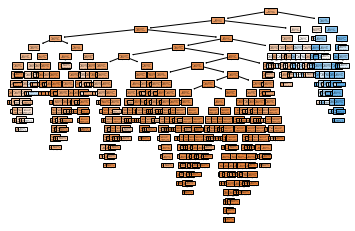

In [36]:
tree.plot_tree(model, filled=True);

## 2a Configuración

In [40]:
model = DecisionTreeClassifier(min_samples_leaf=100)

In [41]:
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=100)

## 1a Configuración

### Precisión

> Tanto en los datos de `Entrenamiento` como de `Testeo`.

In [42]:
model.score(X_train,y_train)

0.8244278606965174

In [43]:
model.score(X_test,y_test)

0.8161616161616162

### Visualización del Árbol

> Interpretamos las precisiones a través de la visualización.

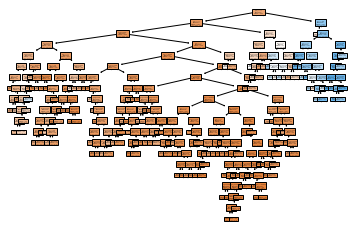

In [44]:
tree.plot_tree(model, filled=True);

In [45]:
model = DecisionTreeClassifier(min_samples_leaf=400)

In [46]:
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=400)

### Precisión

> Tanto en los datos de `Entrenamiento` como de `Testeo`.

In [47]:
model.score(X_train,y_train)

0.8186567164179105

In [48]:
model.score(X_test,y_test)

0.8215151515151515

### Visualización del Árbol

> Interpretamos las precisiones a través de la visualización.

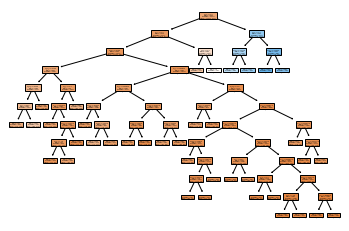

In [49]:
tree.plot_tree(model, filled=True);

## 4a Configuración

In [50]:
model = DecisionTreeClassifier(min_samples_leaf=600)

In [51]:
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=600)

### Precisión

> Tanto en los datos de `Entrenamiento` como de `Testeo`.

In [52]:
model.score(X_train,y_train)

0.8186567164179105

In [53]:
model.score(X_test,y_test)

0.8215151515151515

### Visualización del Árbol

> Interpretamos las precisiones a través de la visualización.

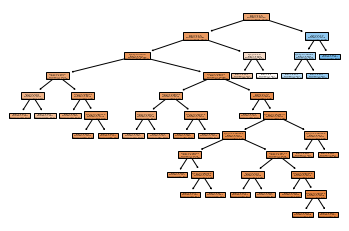

In [54]:
tree.plot_tree(model, filled=True);

## 5a Configuración

In [66]:
model = DecisionTreeClassifier(max_depth=1)

In [67]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

### Precisión

> Tanto en los datos de `Entrenamiento` como de `Testeo`.

In [68]:
model.score(X_train,y_train)

0.8186567164179105

In [69]:
model.score(X_test,y_test)

0.8215151515151515

### Visualización del Árbol

> Interpretamos las precisiones a través de la visualización.

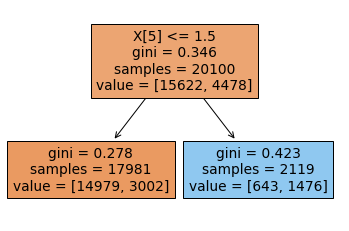

In [70]:
tree.plot_tree(model, filled=True);

# Cross Validation para Seleccionar Mejores Hiperparámetros del Árbol de Decisión

> Obviamente, existe un método para probar diferentes configuraciones de hiperparámetros. Accedemos a él a través del objeto `GridSearchCV`.

In [55]:
from sklearn.model_selection import GridSearchCV

In [57]:
dt = DecisionTreeClassifier()

In [63]:
CV = GridSearchCV(estimator=dt, param_grid={'min_samples_leaf': [50, 100, 200, 400, 800, 1600]}, verbose=2)

In [64]:
CV.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ................................min_samples_leaf=50; total time=   0.2s
[CV] END ................................min_samples_leaf=50; total time=   0.2s
[CV] END ................................min_samples_leaf=50; total time=   0.2s
[CV] END ................................min_samples_leaf=50; total time=   0.2s
[CV] END ................................min_samples_leaf=50; total time=   0.2s
[CV] END ...............................min_samples_leaf=100; total time=   0.1s
[CV] END ...............................min_samples_leaf=100; total time=   0.1s
[CV] END ...............................min_samples_leaf=100; total time=   0.1s
[CV] END ...............................min_samples_leaf=100; total time=   0.1s
[CV] END ...............................min_samples_leaf=100; total time=   0.1s
[CV] END ...............................min_samples_leaf=200; total time=   0.1s
[CV] END ...............................min_sampl

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'min_samples_leaf': [50, 100, 200, 400, 800, 1600]},
             verbose=2)

In [65]:
CV.best_params_

{'min_samples_leaf': 400}

In [61]:
CV.score(X_train, y_train)

0.8186567164179105

In [62]:
CV.score(X_test, y_test)

0.8215151515151515

# Configurar Hiperparámetros de Otros Modelos

## Support Vector Machines

> Veamos cuál es la mejor configuración del objeto `SVC()` para predecir estos datos.

In [71]:
from sklearn.svm import SVC

In [74]:
sv = SVC()

In [75]:
sv.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [76]:
cv_sm = GridSearchCV(estimator=sv, param_grid={'kernel': ['rbf', 'linear']})

In [77]:
cv_sm.fit(X_train, y_train)

KeyboardInterrupt: 

## K Nearest Neighbours

> Veamos cuál es la mejor configuración del objeto `KNeighborsClassifier()` para predecir estos datos.

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
model = KNeighborsClassifier()

In [80]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [81]:
cv_kn = GridSearchCV(model, param_grid={'n_neighbors': [5,10,20,40, 80,160]})

In [82]:
cv_kn.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 20, 40, 80, 160]})

In [83]:
cv_kn.best_estimator_

KNeighborsClassifier(n_neighbors=80)

# Comparación Final de los Modelos con los Mejores Hiperparámetros

> Dentro de cada modelo hemos elegido su mejor configuración. Ahora tocaría preguntarnos cuál de los modelos es el mejor.

# Valores Shapley